In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('package.csv')

In [42]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

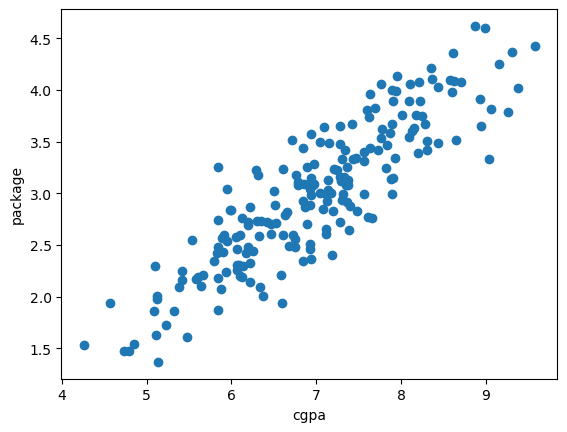

In [43]:
fig = plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [44]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [45]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [46]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [49]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [108]:
from sklearn.linear_model import LinearRegression        

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
# y_pred = lr.predict(X_test)

Text(0, 0.5, 'Package(in lpa)')

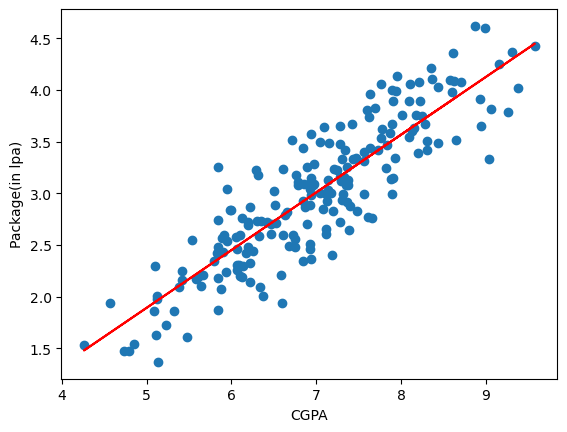

In [54]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [59]:
y_pred = lr.predict(X_test)

In [60]:
 y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [61]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [63]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [65]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [68]:
print("r2_score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2_score 0.780730147510384


In [71]:
# Adjustd r2_score
X_test.shape

1 - ((1 - r2)*(40-1)/(40 - 1 - 1))

0.7749598882343415



# Now with two input but both are irrelivent input

In [110]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.349424,3.26
1,5.12,0.224155,1.98
2,7.82,0.868255,3.25
3,7.42,0.493483,3.67
4,6.94,0.826366,3.57


Text(0, 0.5, 'package')

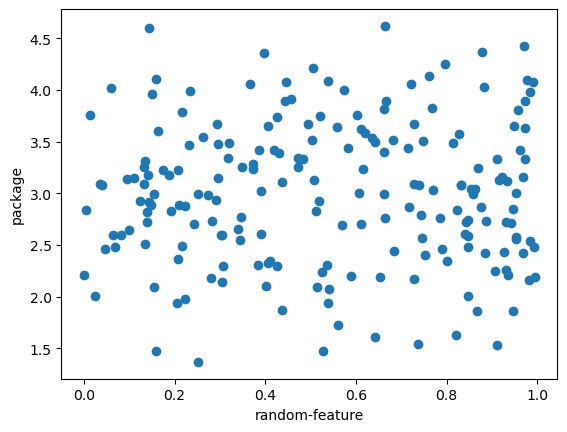

In [111]:
fig = plt.scatter(new_df1['random_feature'], new_df1['package'])   # there is no relation between random_feature and package
plt.xlabel("random-feature")
plt.ylabel("package")

In [112]:
X= new_df1.iloc[:,0:2]
y= new_df1.iloc[:,-1]

In [113]:
X

,cgpa,random_feature
0,6.89,0.349424
1,5.12,0.224155
2,7.82,0.868255
3,7.42,0.493483
4,6.94,0.826366
...,...,...
195,6.93,0.789042
196,5.89,0.744999
197,7.21,0.615997
198,7.63,0.150293


In [114]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [116]:

lr = LinearRegression()

In [117]:
lr.fit(X_train,y_train)

LinearRegression()

In [118]:
y_pred = lr.predict(X_test)

In [120]:
print("r2_score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)


r2_score 0.7799958415412798


In [121]:
# Adjustd r2_score
X_test.shape

1 - ((1 - r2)*(40-1)/(40 - 1 - 1))

0.7742062584239451

# Now with two input but both are relivent input

In [123]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [125]:
new_df2.head()

,cgpa,iq,package
0,6.89,2.26,3.26
1,5.12,2.88,1.98
2,7.82,2.45,3.25
3,7.42,2.77,3.67
4,6.94,2.37,3.57


Text(0, 0.5, 'package')

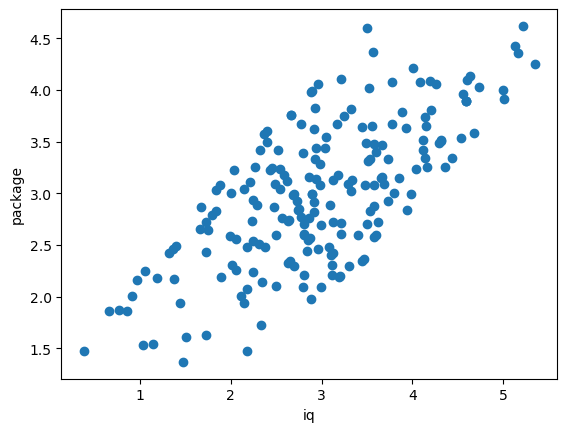

In [133]:
fig = plt.scatter(new_df2['iq'], new_df2['package'])   # there is no relation between random_feature and package
plt.xlabel("iq")
plt.ylabel("package")

In [126]:
X= new_df1.iloc[:,0:2]
y= new_df1.iloc[:,-1]

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [128]:
lr = LinearRegression()

In [129]:
lr.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred = lr.predict(X_test)

In [131]:
print("r2_score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)


r2_score 0.7799958415412798


In [132]:
# Adjustd r2_score
X_test.shape

1 - ((1 - r2)*(40-1)/(40 - 1 - 1))

0.7742062584239451